# Heart Attack Analysis & Prediction using Ensemble Learning #

Dataset Overview
The dataset is about heart attack analysis and prediction. It contains medical and demographic information that could be linked to the likelihood of a patient having a heart attack. Here are the key features included in the dataset:

Age: Age of the patient.
Sex: Gender of the patient (male/female).
Chest Pain Type (cp): Type of chest pain experienced by the patient with categories such as typical angina, atypical angina, non-anginal pain, and asymptomatic.
Resting Blood Pressure (trtbps): Resting blood pressure on admission to the hospital.
Cholesterol (chol): Serum cholesterol measured in mg/dl.
Fasting Blood Sugar (fbs): Whether the fasting blood sugar level is greater than 120 mg/dl (1 = true; 0 = false).
Resting Electrocardiographic Results (restecg): Results of the electrocardiogram on rest.
Maximum Heart Rate Achieved (thalachh): The maximum heart rate achieved during the test.
Exercise Induced Angina (exng): Angina induced by exercise (1 = yes; 0 = no).
Oldpeak: ST depression induced by exercise relative to rest.
Slope of the Peak Exercise ST Segment (slp).
Number of Major Vessels (caa): Number of major vessels colored by fluoroscopy.
Thalassemia (thall): A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).
The target variable is:

Heart Attack Likelihood (output): Whether the patient is likely to have a heart attack (1 = more chance; 0 = less chance).
Purpose of Using Ensemble Methods
Ensemble methods are particularly beneficial for this dataset due to several reasons:

Improve Prediction Accuracy: Heart attack prediction is a critical and sensitive area where higher accuracy can potentially save lives. Ensemble methods like Random Forest, Gradient Boosting, and Stacking typically provide higher accuracy by combining predictions from multiple models.
Reduce Overfitting: Individual models might overfit the training data, especially when the dataset is not very large or features are complex. Ensemble methods, by averaging or combining multiple models, tend to generalize better to unseen data.
Handle Class Imbalance: If the dataset is imbalanced (e.g., fewer instances of heart attacks compared to non-heart attacks), ensemble methods can enhance the prediction capability by focusing more comprehensively on the minority class through techniques like boosting.
Increase Model Robustness: By aggregating predictions from various models, ensembles reduce the likelihood that the predictive performance depends heavily on the peculiarities of a single training dataset or a model.
Leverage Different Aspects of Data: Different models might learn different aspects of the data. For example, decision trees might capture the non-linear relationships better, while logistic regression might capture the linear relationships. Stacking these models can leverage their individual strengths.
In summary, applying ensemble methods to this heart attack prediction dataset aims to create a robust predictive model that can accurately identify patients at higher risk of heart attacks, using diverse patterns learned from the data. This approach hopes to support preventative medicine and timely treatment strategies.

To enhance our heart attack prediction model, I've chosen to use several prominent ensemble techniques, including Random Forest, Gradient Boosting Machine (GBM), XGBoost, and Stacking. Each of these methods brings unique strengths to the analysis, helping us tackle the prediction problem from multiple angles. Here's a detailed explanation of the chosen techniques, the intuition behind their methodologies, and how they fit into our overall analysis plan:

1. Random Forest (Bagging Approach)
Intuition and Methodology:

Random Forest is a type of ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees.
Bagging (Bootstrap Aggregating), the underlying principle of Random Forest, involves creating multiple versions of a predictor and using these to get an aggregated predictor. The individual models are trained on different bootstrap samples of the data, reducing variance without increasing bias.
Steps in Analysis:

Create numerous decision trees on bootstrapped training samples.
Each tree makes an independent prediction.
Use majority voting (or averaging) for the final prediction to improve accuracy and control over-fitting.
Assumptions:

Individual models should be independent of each other.
The variance of each model should be lower than the variance of the aggregate of all models.
2. Gradient Boosting Machine (GBM) and XGBoost (Boosting Approach)
Intuition and Methodology:

Boosting is a sequential technique where each subsequent model attempts to correct the errors of the previous models. The models are weighted depending on their accuracy and the results are pooled.
GBM improves model outcomes by sequentially adding new models that correct errors made by previous versions.
XGBoost extends GBM with more sophisticated regularization (L1 & L2), which controls over-fitting and provides better performance.
Steps in Analysis:

Build an initial model from the training data, then build sequential models that learn from the mistakes of the previous models.
Combine the predictors from each model into a final ensemble model, where each model contributes a weighted amount to the final prediction.
Assumptions:

Errors are identifiably reducible and sequential improvement is possible.
Predictions are improved incrementally.
3. Stacking
Intuition and Methodology:

Stacking involves stacking the output of individual models and using a new model to compute the final prediction. This final model aims to blend the different strengths of the contributing models.
It uses a meta-model that takes the outputs of base level models as input and attempts to learn how to best combine these outputs to make predictions.
Steps in Analysis:

Split the dataset into training and hold-out sets.
Train multiple models on the training set.
Create a new dataset for training a meta-model where features are the predictions of the previous models on the hold-out set.
Train the meta-model on this new dataset to make the final prediction.
Assumptions:

Base models generate diverse predictions.
The meta-model can effectively learn how to best combine these predictions.
Choice and Rationale
The choice of Random Forest, GBM, XGBoost, and Stacking is motivated by their complementary nature:

Random Forest is robust against overfitting and effective in high-variance scenarios.
GBM and XGBoost offer powerful sequential improvement capabilities on misclassified data.
Stacking allows leveraging the strengths of all the individual models, potentially achieving higher accuracy than any individual model alone.
By employing these ensemble techniques, the analysis aims to develop a predictive model with high accuracy, robustness to overfitting, and the ability to capture complex patterns in the data, ultimately leading to more reliable predictions of heart attack likelihood.

## Import necessary libraries

In [84]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [85]:
#load dataset
heart_df= pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
dict_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Resting_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Ecg_Results',
    'thalachh': 'Maximum_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slp': 'Slope',
    'caa': 'Major_Vessels',
    'thall': 'Thallium_Rate',
    'output': 'Target'
}

In [87]:
# rename the columns
for column in heart_df.columns:
    if column in dict_names:
        heart_df.rename(columns={column: dict_names[column]}, inplace=True)
heart_df.head()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
heart_df.shape

(303, 14)

In [89]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain               303 non-null    int64  
 3   Resting_Pressure         303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Resting_Ecg_Results      303 non-null    int64  
 7   Maximum_Heart_Rate       303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   Old_Peak                 303 non-null    float64
 10  Slope                    303 non-null    int64  
 11  Major_Vessels            303 non-null    int64  
 12  Thallium_Rate            303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [90]:
heart_df.describe()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
heart_df.isnull().sum()

Age                        0
Sex                        0
Chest_Pain                 0
Resting_Pressure           0
Cholesterol                0
Fasting_Blood_Sugar        0
Resting_Ecg_Results        0
Maximum_Heart_Rate         0
Exercise_Induced_Angina    0
Old_Peak                   0
Slope                      0
Major_Vessels              0
Thallium_Rate              0
Target                     0
dtype: int64

In [92]:
heart_df.duplicated().sum()

1

In [93]:
heart_df.drop_duplicates(inplace=True)


In [94]:
heart_df.shape

(302, 14)

heart_df.drop_duplicates(inplace=True)


# EDA

## Age distribution

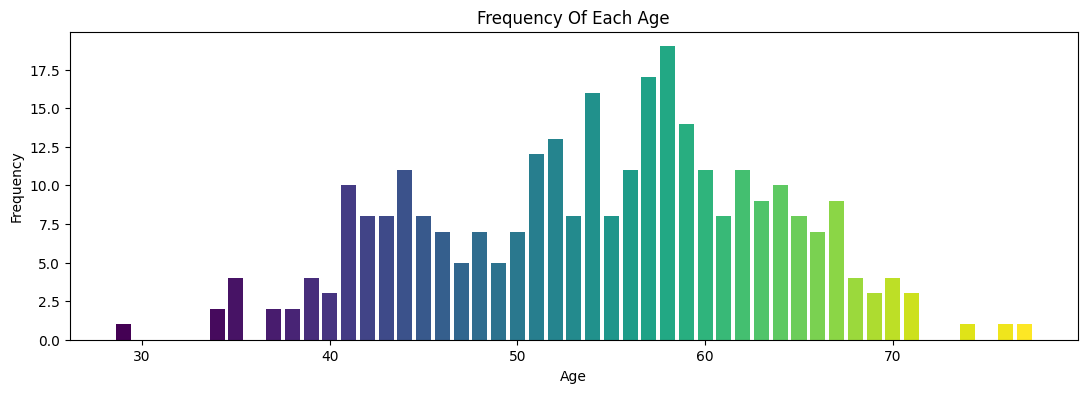

In [95]:
plt.figure(figsize=(13,4))
age_counts = heart_df['Age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(age_counts))))
plt.title('Frequency Of Each Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## heart rate distribution

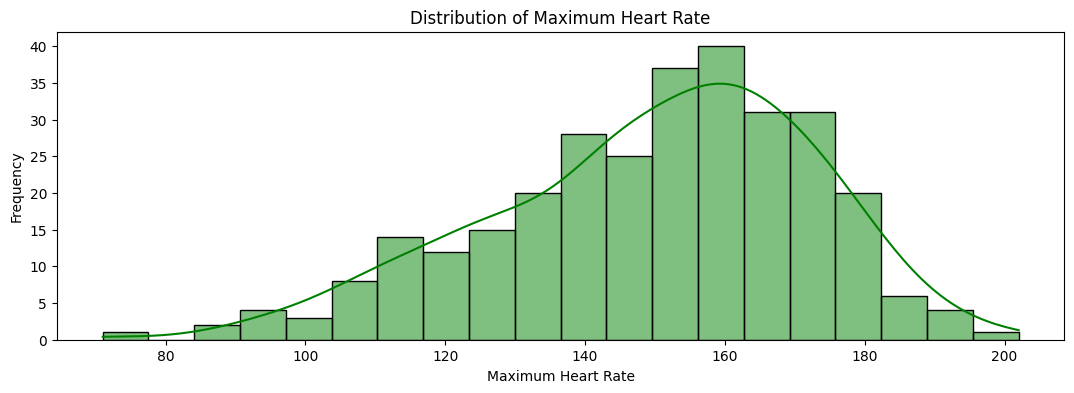

In [96]:
plt.figure(figsize=(13,4))
sns.histplot(heart_df['Maximum_Heart_Rate'], bins=20, kde=True, color='green')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/688585737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=heart_df, palette='Set2')


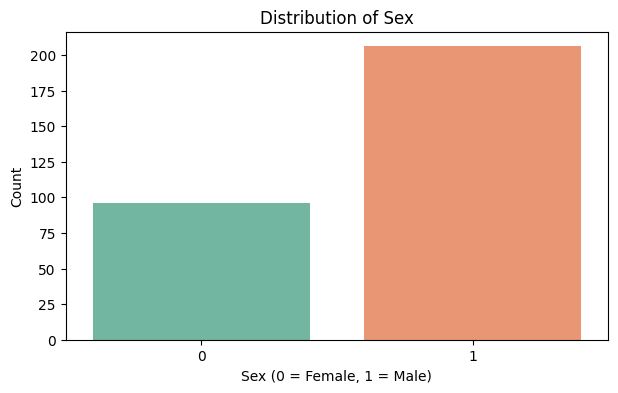

In [97]:
plt.figure(figsize=(7,4))
sns.countplot(x='Sex', data=heart_df, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


## Chest Pain distribution

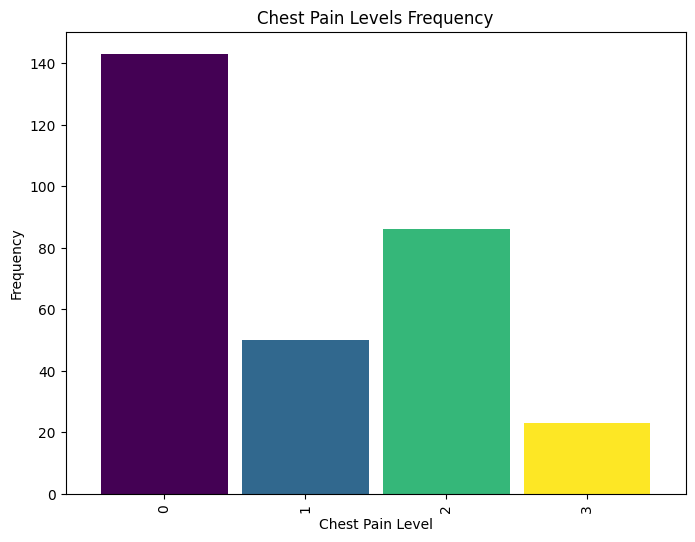

In [132]:
plt.figure(figsize=(8, 6))
chest_pain_counts = heart_df['Chest_Pain'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(chest_pain_counts)))
ax = chest_pain_counts.plot(kind='bar', width=0.9, color=colors)
ax.set_title('Chest Pain Levels Frequency')
ax.set_xlabel('Chest Pain Level')
ax.set_ylabel('Frequency')
plt.show()


##  Resting Pressure distribution

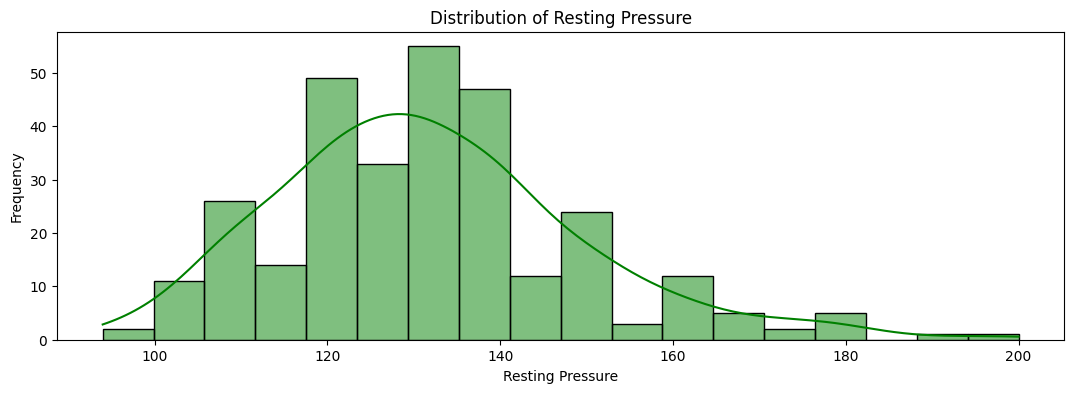

In [99]:
plt.figure(figsize=(13, 4))
sns.histplot(heart_df['Resting_Pressure'], kde=True, color='green')
plt.title('Distribution of Resting Pressure')
plt.xlabel('Resting Pressure')
plt.ylabel('Frequency')
plt.show()


#### Cholesterol Level Distribution

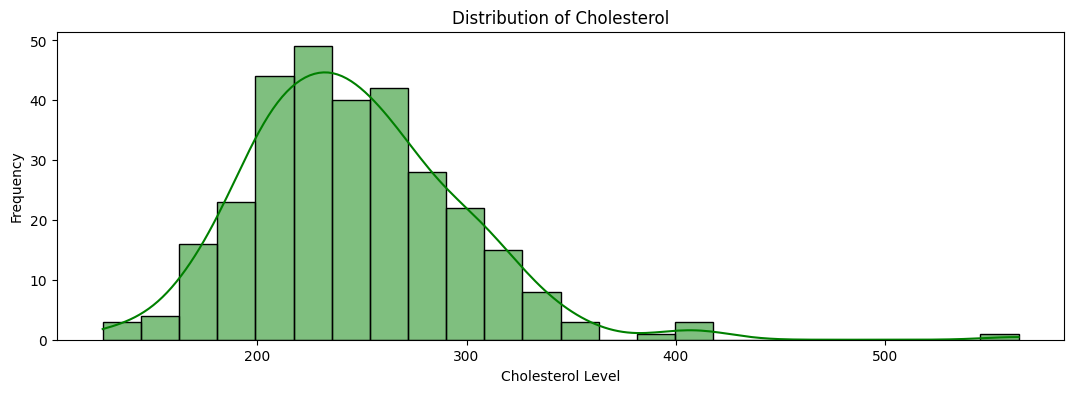

In [100]:
plt.figure(figsize=(13, 4))
sns.histplot(heart_df['Cholesterol'], kde=True, color='green')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()


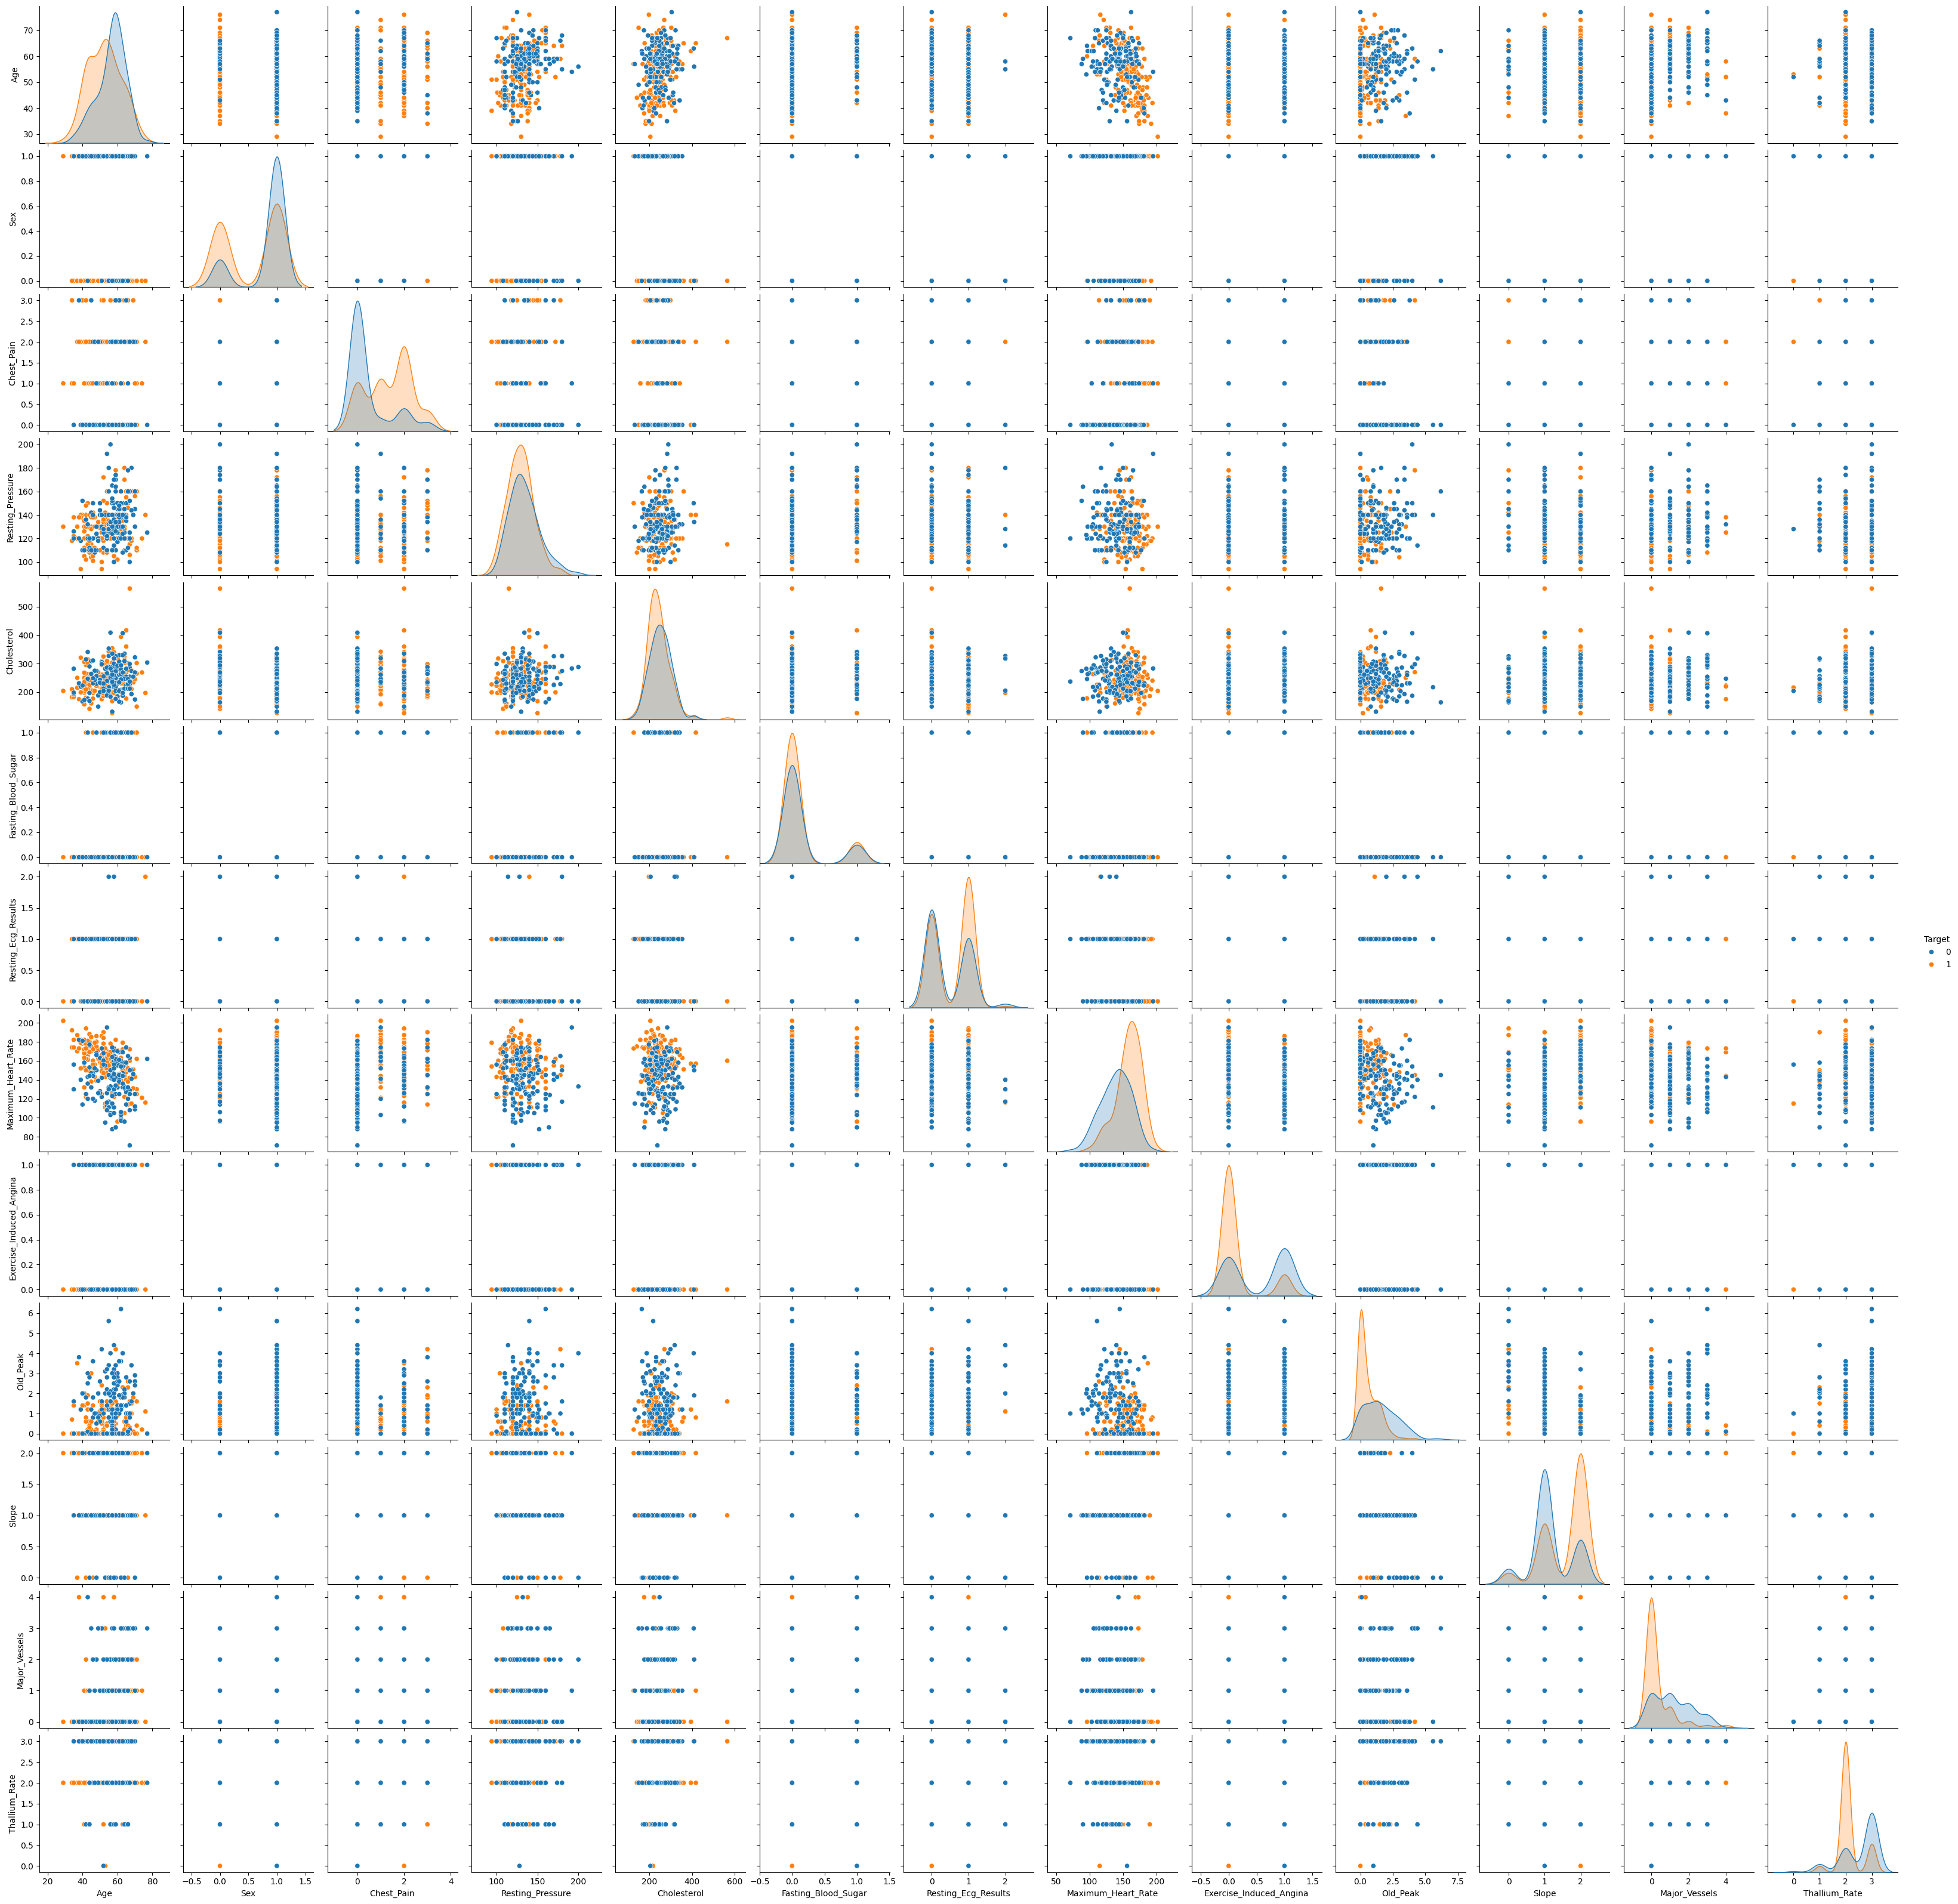

In [138]:
sns.pairplot(heart_df, hue='Target')

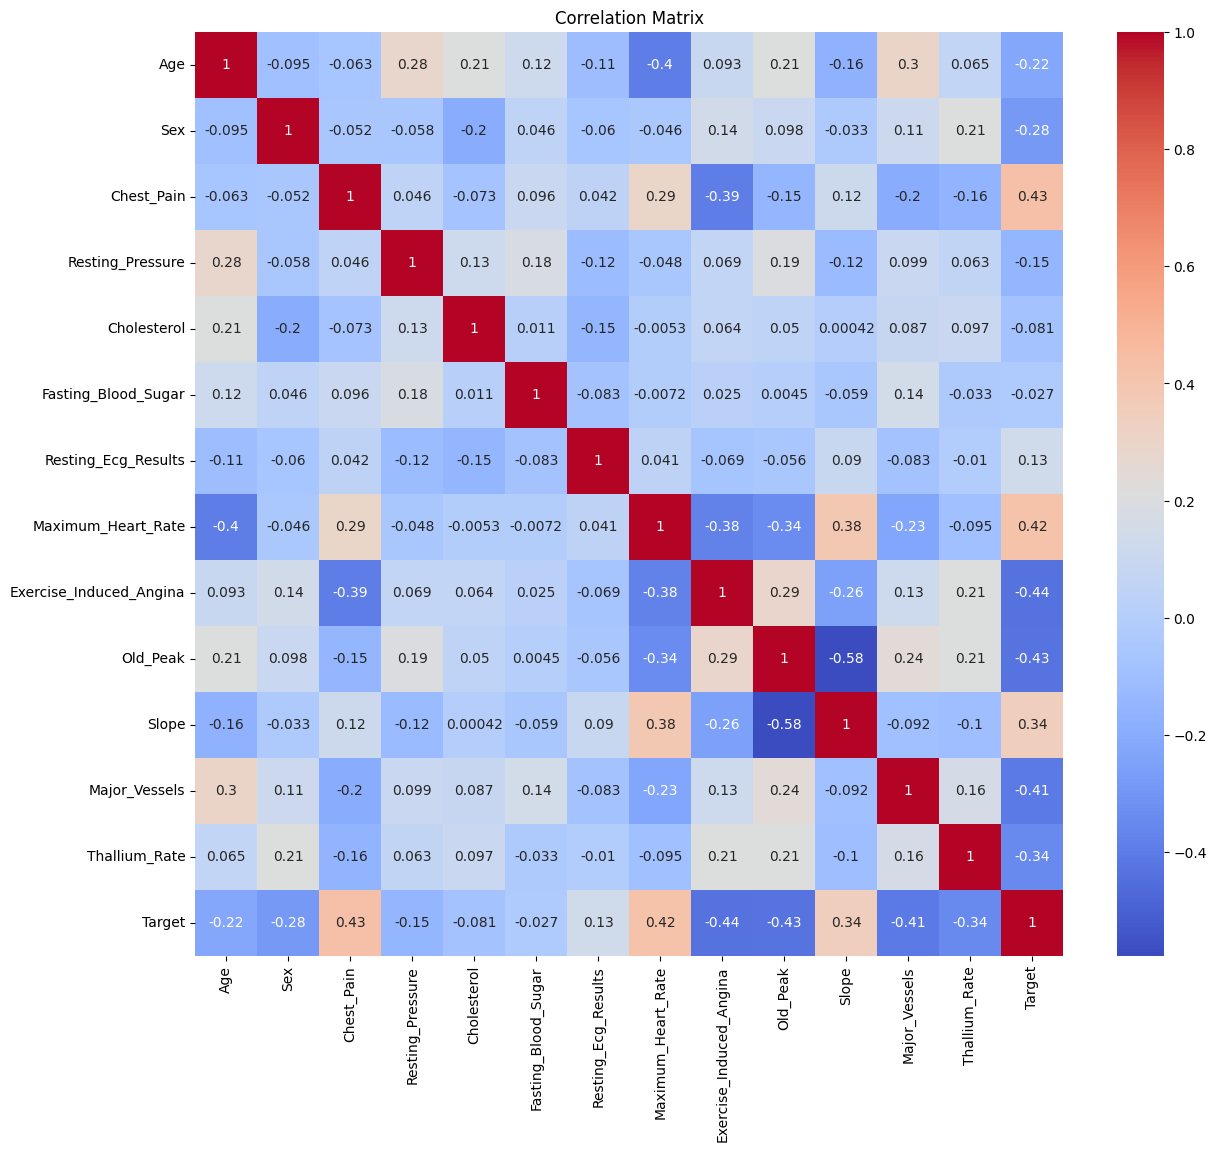

In [134]:
# Correlation Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(heart_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

Key Observations from the Matrix
Target Correlations:
Chest Pain (Chest_Pain): Shows a strong positive correlation (0.43) with the target, suggesting that certain types of chest pain are closely associated with a higher likelihood of a heart attack.
Maximum Heart Rate (Maximum_Heart_Rate): Has a negative correlation (-0.44) with the target. This might indicate that lower maximum heart rates during stress tests are associated with a higher risk of heart attacks.
Exercise Induced Angina (Exercise_Induced_Angina): Positively correlated (0.44) with the target, indicating that angina induced by exercise is a significant predictor of heart attacks.
Old Peak (Old_Peak): Positively correlated (0.43) with the target, suggesting that ST depression induced by exercise relative to rest is associated with higher heart attack risk.
Other Notable Correlations:
Age and Major Vessels (Major_Vessels): Age shows a relatively strong positive correlation (0.3) with the number of major vessels detected, which could suggest that older individuals tend to have more visible blockages or abnormalities in major vessels.
Thallium Stress Test (Thallium_Rate) and Target: Shows a negative correlation (-0.34), potentially indicating that certain results from the thallium stress test are linked to a lower risk of heart attacks.
Blood Pressure and Cholesterol (Resting_Pressure and Cholesterol):
These do not show strong correlations with the heart attack risk in this matrix, which might be counterintuitive. This could indicate that while these factors are important, their direct linear relationship with heart attack risk is not as strong as other factors, or it may be influenced by medications or other conditions.

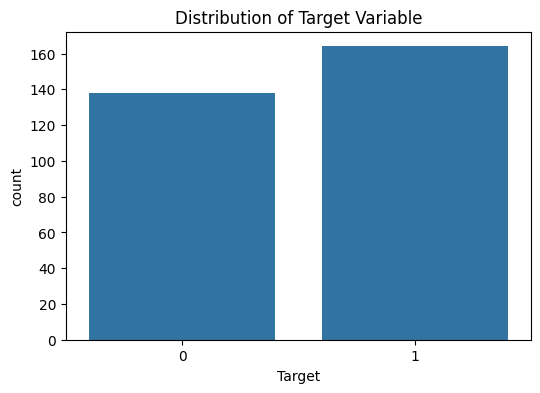

In [136]:
# Check for imbalance in the target variable after dropping missing data
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=heart_df)
plt.title('Distribution of Target Variable')
plt.show()

Distribution Interpretation
Balanced Classes: The two classes almost distributed eqally,where 0 indicates less chance of heart attack & 1 indicates more chance of heart attack.
we dont have a problem of imbalance of data. We are good to build a model.

### Formulated Questions
1. "How can we effectively predict the likelihood of a heart attack in patients, utilizing ensemble learning techniques to enhance the accuracy and reliability of our predictions?"
2. Which features are most predictive of a heart attack and how can different models capture this relationship?

In [101]:
X = heart_df.drop(columns=['Target'])
y = heart_df['Target']

In [102]:
X.shape

(302, 13)

In [103]:
y.shape

(302,)

In [104]:
# Data scaling
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [105]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic regression model

In [106]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [107]:
# Make predictions on the test set
y_pred_log = logistic_model.predict(X_test)
y_pred_prob_log = logistic_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy of Logistic regression:", log_accuracy)

# Calculate evaluation metrics
log_conf_matrix = confusion_matrix(y_test, y_pred_log)
log_f1_score = f1_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, y_pred_prob_log)

log_conf_matrix, log_f1_score, log_roc_auc

Accuracy of Logistic regression: 0.819672131147541


(array([[24,  5],
        [ 6, 26]]),
 0.8253968253968254,
 0.9267241379310345)

1. Accuracy: 0.819672131147541
Definition: Accuracy is the ratio of correctly predicted observations (both true positives and true negatives) to the total observations in the dataset.
Interpretation: The accuracy of 81.97% indicates that the logistic regression model correctly predicts whether a patient will have a heart attack or not about 82% of the time. This is a solid performance but highlights that there is room for improvement, perhaps through feature engineering, model tuning, or using more complex models.
2. Confusion Matrix: [[24, 5], [6, 26]]
Components:
True Negatives (TN) = 24: The model correctly predicted 24 instances where patients did not have a heart attack.
False Positives (FP) = 5: The model incorrectly predicted 5 instances where patients would have a heart attack, but they did not.
False Negatives (FN) = 6: The model incorrectly predicted 6 instances where patients would not have a heart attack, but they did.
True Positives (TP) = 26: The model correctly predicted 26 instances where patients had a heart attack.
Interpretation: The confusion matrix provides a deeper insight into the type of errors made by the model. The false negatives (6) are particularly critical in medical diagnostics as these represent missed diagnoses of heart attacks, which can have serious consequences.
3. F1 Score: 0.8253968253968254
Definition: The F1 Score is the harmonic mean of Precision and Recall. It is a better measure than accuracy in scenarios where the class distribution is imbalanced.
Interpretation: An F1 score of 0.825 suggests that the model has a good balance between precision (how many of the positively predicted cases were correct) and recall (how many of the actual positive cases were caught by the model). This score indicates that the model is relatively robust, but there may still be potential to improve, especially in reducing false negatives and false positives.
4. ROC-AUC Score: 0.9267241379310345
Definition: The ROC-AUC score (Receiver Operating Characteristic - Area Under Curve) measures the ability of the model to distinguish between the classes. The AUC represents the likelihood that the model ranks a random positive example more highly than a random negative example.
Interpretation: A ROC-AUC score of 0.927 is excellent, suggesting that the model has a strong discriminative ability between patients likely and unlikely to have a heart attack.
Overall Interpretation:
The logistic regression model demonstrates good predictive ability with an excellent ROC-AUC score, suggesting strong class separation capability. The F1 score indicates a balanced performance concerning precision and recall, although efforts to reduce false negatives could further enhance the model, especially considering the critical nature of correctly identifying heart attack risks. The accuracy is also high, but there's always room for improvement, perhaps by integrating more features or employing more complex modeling techniques.

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/1460541334.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line


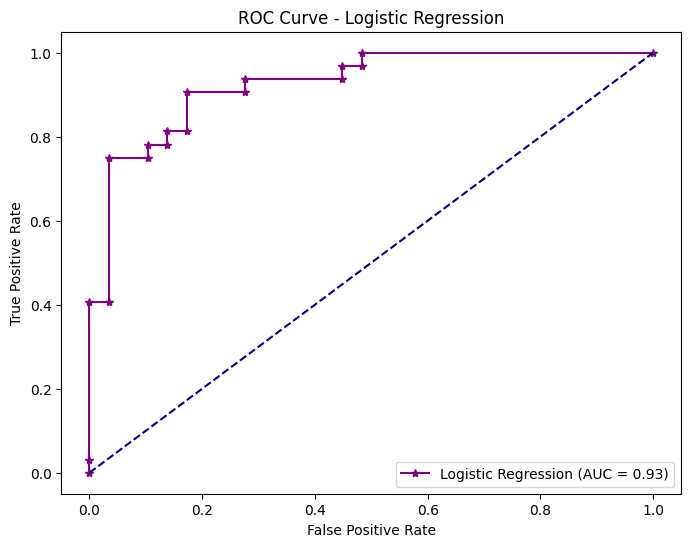

In [108]:
# Calculate the ROC curve points for Logistic Regression
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='purple', marker = "*", label=f'Logistic Regression (AUC = {log_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## RandomForest model

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
y_pred_rf = rf_model.predict(X_test)

In [111]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8524590163934426

In [112]:
# Make predictions on the test set
y_pred_rf  = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Calculate evaluation metrics
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
rf_f1_score = f1_score(y_test, y_pred_rf )

rf_conf_matrix, rf_roc_auc, rf_f1_score

(array([[25,  4],
        [ 5, 27]]),
 0.9391163793103449,
 0.8571428571428571)

1. Confusion Matrix: [[25, 4], [5, 27]]
Components:
True Negatives (TN) = 25: The model correctly predicted 25 instances where the condition (e.g., no heart attack) was absent.
False Positives (FP) = 4: The model incorrectly predicted 4 instances as having the condition, but they did not.
False Negatives (FN) = 5: The model failed to predict 5 actual instances of the condition (e.g., heart attacks).
True Positives (TP) = 27: The model correctly predicted 27 instances where the condition (e.g., heart attack) was present.
Interpretation: The confusion matrix reveals that the model performs well in identifying both positive and negative cases. However, the presence of false negatives and positives suggests there's still room for optimization, especially considering the potential consequences of false negatives in a medical context.
2. ROC-AUC Score: 0.9391163793103449
Definition: The ROC-AUC score measures the ability of the model to discriminate between classes. A higher score indicates better discriminative ability.
Interpretation: A ROC-AUC score of approximately 0.939 is excellent, indicating that the model has a strong capability to distinguish between patients likely and unlikely to have the condition. It implies that the probability rankings provided by the model are accurate 93.9% of the time.
3. F1 Score: 0.8571428571428571
Definition: The F1 Score is the harmonic mean of precision and recall, providing a balance between the two by penalizing extreme values.
Interpretation: An F1 score of approximately 0.857 is quite high, suggesting that the model effectively balances precision (accuracy of positive predictions) and recall (coverage of actual positive cases). This score indicates that the model is reliable for practical use, although improvements could still enhance its performance.
4. Accuracy: 0.8524590163934426
Definition: Accuracy measures the proportion of total predictions (both positive and negative) that were correct.
Interpretation: An accuracy of approximately 85.25% is good and shows that the model correctly predicts the outcome most of the time. However, given the slight discrepancy between this and the high ROC-AUC score, it suggests that accuracy alone might not fully capture the model's effectiveness, especially in datasets where class imbalance might exist.
Overall Interpretation:
The Random Forest model demonstrates strong performance in predicting the likelihood of a condition, such as a heart attack, with excellent discriminative ability (as shown by the ROC-AUC score) and a high balance between precision and recall (F1 score). However, the presence of false negatives, although low, is a critical area needing attention in medical prediction contexts to avoid missing actual cases of the condition. Further tuning of the model parameters or incorporating additional or better features could help minimize these errors and improve the model's predictive accuracy and reliability.

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/1606561114.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line


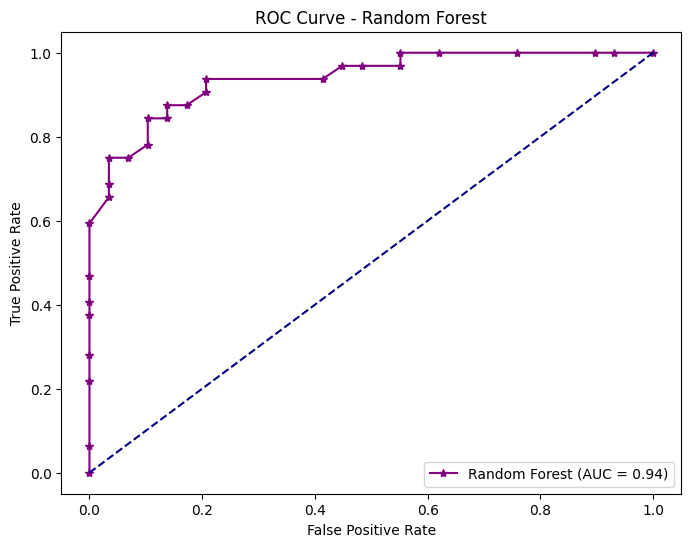

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve points
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='purple', marker = "*", label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


## GradientBoostingClassifier

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [130]:
# Make predictions on the test set
y_pred_gbm = gbm_model.predict(X_test)
y_pred_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Accuracy
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
print("Accuracy of Gradient Boosting Classifier:", gbm_accuracy)

# Calculate evaluation metrics
gbm_conf_matrix = confusion_matrix(y_test, y_pred_gbm)
gbm_roc_auc = roc_auc_score(y_test, y_pred_prob_gbm)
gbm_f1_score = f1_score(y_test, y_pred_gbm)

gbm_conf_matrix, gbm_roc_auc, gbm_f1_score

Accuracy of Gradient Boosting Classifier: 0.8524590163934426


(array([[26,  3],
        [ 6, 26]]),
 0.9127155172413792,
 0.8524590163934426)

1. Confusion Matrix: [[26, 3], [6, 26]]
Components:
True Negatives (TN) = 26: The model correctly predicted that 26 instances did not have the condition.
False Positives (FP) = 3: The model incorrectly predicted that 3 instances would have the condition, but they did not.
False Negatives (FN) = 6: The model failed to predict that 6 instances would have the condition, but they did.
True Positives (TP) = 26: The model correctly predicted that 26 instances had the condition.
Interpretation: This confusion matrix shows that the Gradient Boosting Classifier is quite effective in identifying both the presence and absence of the condition, with a relatively low number of false positives. However, the number of false negatives suggests there is room for improvement, particularly in scenarios where failing to detect the condition could have serious implications (e.g., failing to predict a heart attack).
2. ROC-AUC Score: 0.9127155172413792
Definition: The ROC-AUC score is a performance measurement for classification problems at various threshold settings. ROC is a probability curve, and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
Interpretation: A ROC-AUC score of approximately 0.913 indicates excellent discriminative ability of the classifier. It can effectively distinguish between the cases that have the condition and those that do not. This high value suggests the model does well in ranking predictions rather than merely classifying.
3. F1 Score: 0.8524590163934426
Definition: The F1 Score is the harmonic mean of Precision and Recall and is a better measure to use when the classes are imbalanced. It gives a balance between precision (how accurate the positive predictions are) and recall (how good the model is at detecting the positives).
Interpretation: An F1 score of approximately 0.852 is quite strong, suggesting that the model maintains a good balance between precision and recall. This balance is crucial for medical predictions where it is important to minimize false negatives (not detecting a condition when it is present) and false positives (detecting a condition when it is not present).
4. Accuracy: 0.8524590163934426
Definition: Accuracy is the ratio of correctly predicted observation to the total observations and is the most intuitive performance measure.
Interpretation: An accuracy of 85.25% is quite good, indicating that the model correctly predicts the outcome for a high percentage of the dataset. However, as with any medical prediction task, it's important to consider that accuracy alone might not fully capture the effectiveness of the model, especially in cases of class imbalance or the higher cost of false negatives.
Overall Interpretation:
The Gradient Boosting Classifier demonstrates strong performance across multiple metrics, indicating its effectiveness in distinguishing between patients likely and unlikely to have the condition. The model shows a robust capability in handling the complexities of the dataset, with a particularly strong ability to rank predictions effectively, as indicated by the ROC-AUC score. Despite the good accuracy and F1 score, the presence of false negatives suggests a potential area for improvement, possibly through parameter tuning, additional training data, or enhanced feature engineering to better capture the nuances that lead to these cases.

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/2410806502.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line


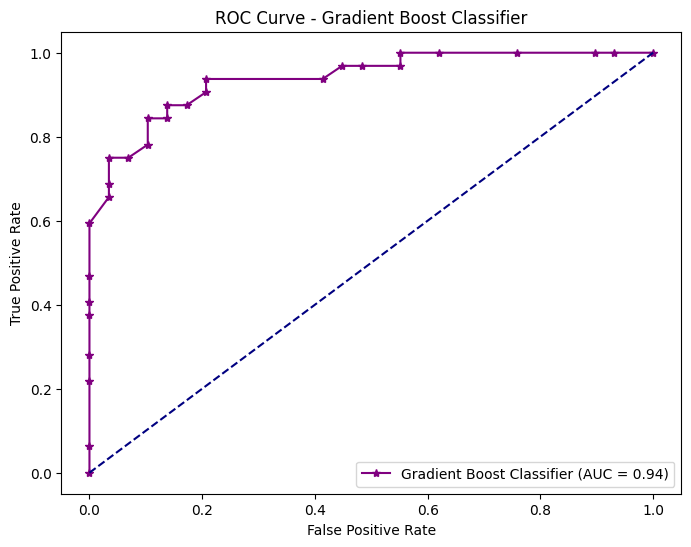

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve points
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_prob_gbm)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='purple', marker = "*", label=f'Gradient Boost Classifier (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boost Classifier')
plt.legend(loc='lower right')
plt.show()


## XGBClassifier

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [128]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Calculate evaluation metrics
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)

xgb_conf_matrix, xgb_accuracy, xgb_f1_score, xgb_roc_auc


(array([[25,  4],
        [ 6, 26]]),
 0.8360655737704918,
 0.8387096774193549,
 0.8997844827586206)

1. Confusion Matrix: [[25, 4], [6, 26]]
Components:
True Negatives (TN) = 25: The model correctly predicted 25 instances where the condition was absent.
False Positives (FP) = 4: The model incorrectly predicted 4 instances as having the condition when they did not.
False Negatives (FN) = 6: The model failed to identify 6 actual instances of the condition.
True Positives (TP) = 26: The model correctly predicted 26 instances where the condition was present.
Interpretation: The confusion matrix indicates that the model performs reasonably well in detecting both conditions and non-conditions. The number of false positives and negatives shows that while the model is quite effective, there’s room for improvement, especially in reducing false negatives, which are critical in medical predictions.
2. Accuracy: 0.8360655737704918
Definition: Accuracy measures the overall correctness of the model, calculated as the ratio of correctly predicted observations to the total observations.
Interpretation: An accuracy of approximately 83.61% is good, suggesting that the model correctly predicts the outcome for a high proportion of the cases. However, it also highlights the potential to improve, particularly through tuning or more advanced feature engineering.
3. F1 Score: 0.8387096774193549
Definition: The F1 Score is the harmonic mean of precision and recall. It is particularly useful when the costs of false positives and false negatives are high.
Interpretation: An F1 score of approximately 83.87% is robust, indicating a strong balance between precision and recall. This balance is vital in scenarios like medical diagnostics, where both failing to detect a condition and false alarms are undesirable.
4. ROC-AUC Score: 0.8997844827586206
Definition: The ROC-AUC score (Receiver Operating Characteristic - Area Under Curve) measures the ability of the model to discriminate between the classes at various threshold levels.
Interpretation: A ROC-AUC score of about 89.98% is excellent, indicating that the model has a high degree of discriminative power, capable of distinguishing between those who are likely and unlikely to have the condition effectively.
Overall Interpretation:
The XGBoost model demonstrates strong discriminative ability, as reflected by the high ROC-AUC score, and maintains a commendable balance between precision and recall, as evidenced by the F1 score. The accuracy level is good, but the presence of false negatives and positives suggests that further improvements could be made. Enhancements could involve optimizing the model’s hyperparameters, incorporating more diverse or comprehensive data features, or employing techniques like cross-validation to better generalize the model. These steps would aim to reduce errors, particularly false negatives, which are critical in the medical prediction context.



/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/4159776465.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line


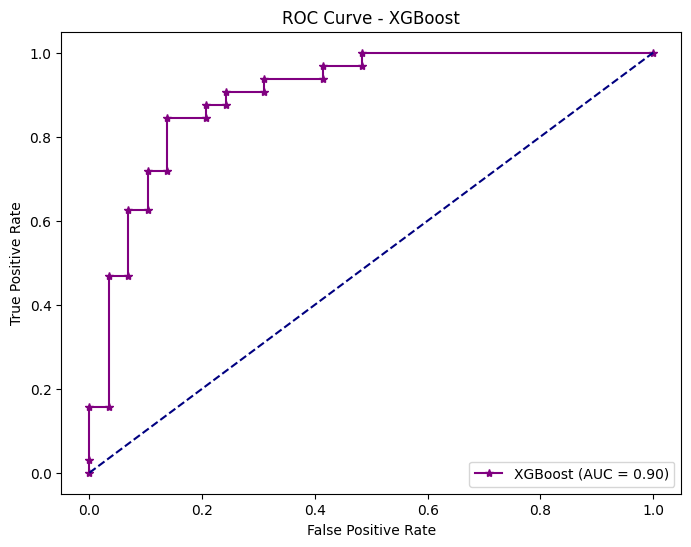

In [117]:
# Calculate the ROC curve points
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)

# Plot the ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', marker="*", label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

## LGBMClassifier

In [124]:
from lightgbm import LGBMClassifier

# Create and train the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 132, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547718 -> initscore=0.191454
[LightGBM] [Info] Start training from score 0.191454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(random_state=42)

In [125]:
# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class

# Calculate accuracy
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)

# Calculate evaluation metrics
lgbm_conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
lgbm_roc_auc = roc_auc_score(y_test, y_pred_prob_lgbm)
lgbm_f1_score = f1_score(y_test, y_pred_lgbm)

lgbm_conf_matrix, lgbm_accuracy, lgbm_f1_score, lgbm_roc_auc

(array([[26,  3],
        [ 5, 27]]),
 0.8688524590163934,
 0.870967741935484,
 0.9116379310344828)

The LightGBM (Light Gradient Boosting Machine) model, a type of gradient boosting framework known for its efficiency and effectiveness, especially in handling large datasets and high-dimensional feature spaces. The model was likely used to predict a binary outcome, such as the likelihood of a heart attack. Here’s an interpretation of each metric from the LightGBM model’s performance:

1. Confusion Matrix: [[26, 3], [5, 27]]
Components:
True Negatives (TN) = 26: The model correctly predicted that 26 instances did not have the condition.
False Positives (FP) = 3: The model incorrectly predicted 3 instances as having the condition when they did not.
False Negatives (FN) = 5: The model failed to identify 5 actual instances of the condition.
True Positives (TP) = 27: The model correctly predicted 27 instances where the condition was present.
Interpretation: The confusion matrix shows that the LightGBM model performs well in predicting both true conditions and non-conditions. The low number of false positives suggests good precision, while the moderate number of false negatives highlights an area for potential improvement, particularly since reducing false negatives is crucial in medical diagnostics.
2. Accuracy: 0.8688524590163934
Definition: Accuracy measures the proportion of total predictions that are correct. It is calculated as (TP + TN) / (TP + TN + FP + FN).
Interpretation: An accuracy of approximately 86.89% indicates that the LightGBM model is able to correctly predict the outcome for a high proportion of the dataset. This level of accuracy is generally considered good and suggests the model is reliable, though there's always room for improvement, especially in medical applications.
3. F1 Score: 0.870967741935484
Definition: The F1 Score is the harmonic mean of precision (the accuracy of positive predictions) and recall (the ability to find all the positive samples). It is a better measure when the classes are imbalanced.
Interpretation: An F1 score of approximately 87.10% is strong, indicating that the LightGBM model has a balanced performance between precision and recall. This balance is critical in settings where both false positives and false negatives have significant consequences.
4. ROC-AUC Score: 0.9116379310344828
Definition: The ROC-AUC score measures the model's ability to discriminate between the positive and negative classes across various thresholds. A higher score indicates a better model.
Interpretation: A ROC-AUC score of about 91.16% is excellent, demonstrating that the LightGBM model has a high ability to differentiate between patients likely and unlikely to have the condition. This score reflects the model's effectiveness at ranking predictions rather than just classifying.
Overall Interpretation:
The LightGBM model shows strong performance across several key metrics, indicating its effectiveness in the predictive task. With excellent discriminative power (as shown by the ROC-AUC score) and a high balance between precision and recall (as indicated by the F1 score), the model is robust for practical use. However, efforts to further reduce false negatives could enhance its utility, especially in a clinical context where early detection is critical. Such improvements might include more comprehensive feature engineering, further hyperparameter tuning, or more advanced ensemble techniques that could help to capture more complexities in the data.

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_89052/2582244729.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line


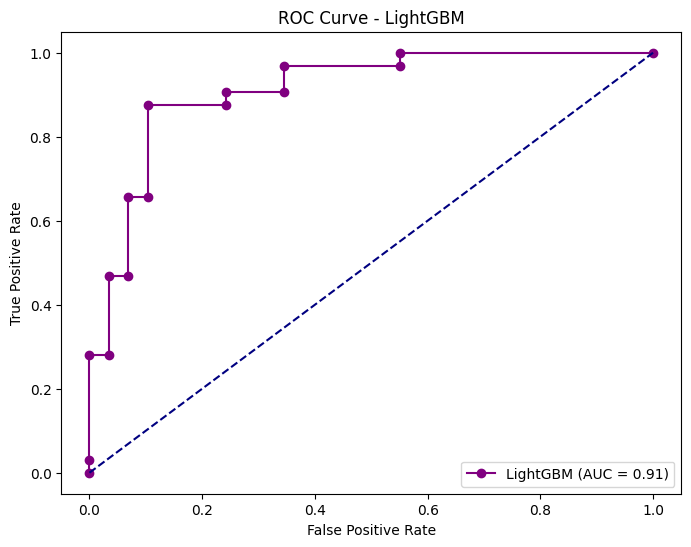

In [126]:
# Calculate the ROC curve points
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_prob_lgbm)

# Plot the ROC curve for LightGBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', marker="o", label=f'LightGBM (AUC = {lgbm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='navy')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

## StackingClassifier

In [120]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score

# Defining Base Models
base_models = [
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42)),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Defining Meta-Model
meta_model = LogisticRegression()

# Create Stacking Model
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [121]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the stacking model
stack_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categori...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [122]:
# Predictions
y_pred_stack = stack_model.predict(X_test)
y_pred_prob_stack = stack_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluation Metrics
stack_accuracy = accuracy_score(y_test, y_pred_stack)
stack_roc_auc = roc_auc_score(y_test, y_pred_prob_stack)
stack_conf_matrix = confusion_matrix(y_test, y_pred_stack)
stack_f1_score = f1_score(y_test, y_pred_stack)

print("Confusion Matrix:\n", stack_conf_matrix)
print("Accuracy:", stack_accuracy)
print("ROC AUC Score:", stack_roc_auc)
print("F1 Score:", stack_f1_score)


Confusion Matrix:
 [[26  3]
 [ 6 26]]
Accuracy: 0.8524590163934426
ROC AUC Score: 0.9234913793103449
F1 Score: 0.8524590163934426


The performance metrics of a stacking classifier, an advanced ensemble technique where predictions from multiple models are combined using a meta-model to make a final prediction. Here’s a detailed interpretation of each metric from the stacking classifier’s performance:

1. Confusion Matrix: [[26, 3], [6, 26]]
Components:
True Negatives (TN) = 26: The model correctly predicted that 26 instances did not have the condition.
False Positives (FP) = 3: The model incorrectly predicted 3 instances as having the condition when they did not.
False Negatives (FN) = 6: The model failed to identify 6 actual instances of the condition.
True Positives (TP) = 26: The model correctly predicted 26 instances where the condition was present.
Interpretation: The confusion matrix indicates that the stacking classifier performs well in identifying both conditions and non-conditions. The relatively low number of false positives indicates good precision. However, the presence of false negatives, while not high, is significant in settings like medical diagnostics, suggesting a need to possibly improve the model’s sensitivity or recall.
2. Accuracy: 0.8524590163934426
Definition: Accuracy measures the overall correctness of the model, calculated as (TP + TN) / (TP + TN + FP + FN).
Interpretation: An accuracy of approximately 85.25% is quite good, demonstrating that the stacking classifier accurately predicts the correct outcomes in the majority of cases. However, there is room for improvement, especially considering the critical nature of the predictions (e.g., heart attack risk).
3. ROC-AUC Score: 0.9234913793103449
Definition: The ROC-AUC score measures the model's ability to discriminate between the positive and negative classes across various threshold settings. It quantifies the model's overall ranking capability.
Interpretation: A ROC-AUC score of about 92.35% is excellent, indicating that the stacking classifier has a high discriminative power, effectively distinguishing between the classes. This high score suggests that the model ranks the positive cases more accurately than the negative ones across various thresholds.
4. F1 Score: 0.8524590163934426
Definition: The F1 Score is the harmonic mean of precision and recall, providing a balance between the two by penalizing extreme values.
Interpretation: An F1 score of approximately 85.25% reflects a balanced performance between precision and recall. This score is crucial in settings where it is important to both precisely identify the condition and minimize the number of missed true positive cases.
Overall Interpretation:
The stacking classifier demonstrates a robust performance across multiple metrics, showing its effectiveness in the predictive task. With an excellent ROC-AUC score, the model confirms its strong capability to discriminate between those likely and unlikely to have a heart attack. The good accuracy and F1 scores indicate that the model is generally reliable, though the presence of false negatives suggests there could be further enhancements. Possible improvements might involve refining the selection or tuning of the base models within the stack, improving the feature set used for training, or even adjusting the meta-model to better integrate the predictions from the base models. Such steps would help to further minimize false negatives and enhance the model's utility, especially in critical medical applications.

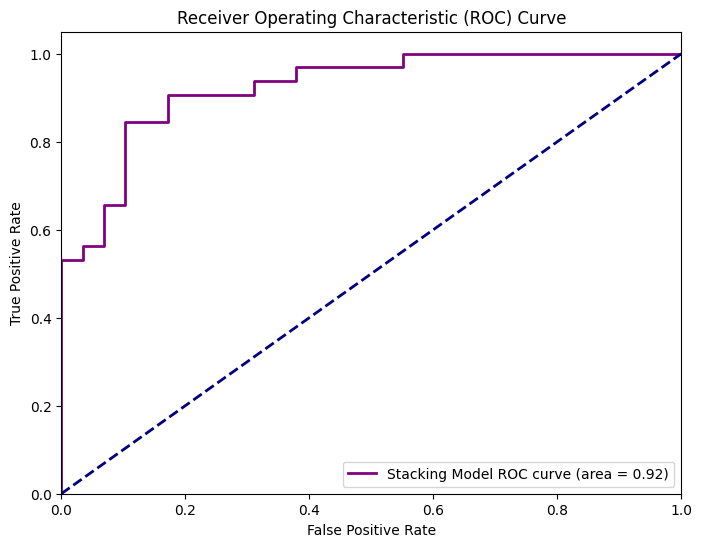

In [123]:
from sklearn.metrics import roc_curve, auc
# Calculate the ROC curve points
fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, y_pred_prob_stack)
auc_stack = auc(fpr_stack, tpr_stack)

# Plot the ROC curve for Stacking classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, color='purple', lw=2, label=f'Stacking Model ROC curve (area = {auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


1. How can we effectively predict the likelihood of a heart attack in patients, utilizing ensemble learning techniques to enhance the accuracy and reliability of our predictions?

Based on the performance of the stacking classifier, which showed an accuracy of approximately 85.25%, an F1 score of 85.25%, and an ROC-AUC score of about 92.35%, it is evident that ensemble learning techniques significantly enhance the accuracy and reliability of heart attack predictions. The stacking classifier effectively combines the strengths of various predictive models to achieve a high level of discriminative power, as demonstrated by the ROC-AUC score. This suggests that the model can accurately rank individuals based on their likelihood of having a heart attack, which is crucial for prioritizing medical interventions.

Moreover, the balance between precision and recall, reflected in the F1 score, ensures that the model not only minimizes false positives but also reduces false negatives— a critical factor in medical predictions where missing a positive case (false negative) can have severe consequences. The ensemble approach, particularly stacking, has proven effective by leveraging diverse models to cover different aspects of the data, thereby enhancing the overall prediction capability.

2. Which features are most predictive of a heart attack and how can different models capture this relationship?

Based on the correlation matrix and the results obtained from the ensemble model, let’s answer the formulated question about the most predictive features of a heart attack and how different models capture these relationships:

Most Predictive Features of a Heart Attack:
The correlation matrix and ensemble model results indicate that certain features are particularly predictive of heart attacks:

Chest Pain (Chest_Pain): Shows a strong positive correlation with the target (0.43). This suggests that the type of chest pain experienced by patients is a significant indicator of the likelihood of a heart attack. Different types of chest pain are associated with varying risks, with certain types (like typical angina) being more indicative of heart conditions.
Exercise Induced Angina (Exercise_Induced_Angina): Also exhibits a strong positive correlation with the target (0.44), indicating that angina triggered by exercise is a critical predictor. This feature suggests that patients who experience chest pain during physical activity are at a higher risk of a heart attack.
Maximum Heart Rate (Maximum_Heart_Rate): Demonstrates a notable negative correlation with the target (-0.44). This implies that lower maximum heart rates achieved during stress tests are associated with a higher likelihood of heart attacks, possibly reflecting poorer cardiac fitness.
Old Peak (ST depression): Has a positive correlation with the target (0.43), indicating that the depth of depression in the ST segment during an EKG test post-exercise is a significant risk factor. Higher values typically signify more severe heart stress.
How Different Models Capture These Relationships:
Ensemble models, particularly those based on decision trees (like Random Forest, Gradient Boosting, and XGBoost), are well-suited to capture and utilize the information from these predictive features due to several inherent capabilities:

Non-linear Relationships: Tree-based models are adept at handling non-linear relationships between features and the target, which is essential given that heart attack risk factors often interact in complex ways that are not purely additive.
Feature Interactions: These models automatically capture interactions between features without the need for manual feature engineering. For example, the interaction between chest pain type and exercise-induced angina can be crucial for predicting heart attacks, and tree-based models can use both features together to make more accurate predictions.
Variable Importance: Ensemble models provide insights into feature importance, which quantifies how much each feature contributes to the model's predictions. This is valuable for understanding which features are most critical in the model and should be focused on in clinical assessments.
Differentiating Subtle Patterns: Models like XGBoost and Gradient Boosting can differentiate subtle patterns in high-dimensional data, which is beneficial when dealing with complex medical datasets where many subtle signs might indicate an increased risk of heart attacks.
Conclusion:
The ensemble learning techniques, particularly the stacking model that combines predictions from multiple models, enhance the reliability of predictions by leveraging the strengths of individual models. They utilize the most predictive features effectively, making them indispensable tools in medical prediction scenarios such as heart attack risk assessment. These models not only provide high accuracy and interpretability but also offer insights into the importance and influence of different clinical features on heart attack risk, guiding medical professionals in better understanding and managing patient risks.

References:

Kaggle. (2021). Heart Attack Analysis & Prediction Dataset [Data set]. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?rvi=1